In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d
import matplotlib.ticker as ticker
from matplotlib import cm
import matplotlib.gridspec as gridspec

In [2]:
def MySquarePlot(xlab='',ylab='',\
                 lw=2,lfs=30,tfs=22,size_x=13,size_y=8,Grid=False):
    plt.rcParams['axes.linewidth'] = lw
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif',size=tfs)

    fig = plt.figure(figsize=(size_x,size_y))
    ax = fig.add_subplot(111)

    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)

    ax.tick_params(which='major',direction='in',width=1,length=10,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=0.75,length=7.5,right=True,top=True)
    if Grid:
        ax.grid()
    return fig,ax

def MyDoublePlot(xlab1='',ylab1='',xlab2='',ylab2='',\
                 wspace=0.12,lw=2,lfs=30,tfs=22,size_x=20,size_y=9,Grid=False):
    plt.rcParams['axes.linewidth'] = lw
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif',size=tfs)
    #mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']
    fig, axarr = plt.subplots(1, 2,figsize=(size_x,size_y))
    gs = gridspec.GridSpec(1, 2)
    gs.update(wspace=wspace)
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=8,right=True,top=True)
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=8,right=True,top=True)

    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)

    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)

    if Grid:
        ax1.grid()
        ax2.grid()
    return fig,ax1,ax2

In [3]:
def PhaseSpace(y):
    return 1/(1 - y**2)*(1 - y**4 + 4*y**2 *np.log(y))

Pre = 6.49*10**10
C = 1

def tau0(Pre,C,mH,ml,Y):
    return Pre*C*PhaseSpace(ml/mH)*(mH/0.05)**5*1/Y

def tau0naive(Pre,C,mH,ml,Y):
    return Pre*C*(mH/0.05)**5*1/Y

# Escudero/Fairbairn

YboundsA = [[0.001,0.0087,0.05,0.1,0.15],[1.45*10**4,1.45*10**4,3.11*10**4,5.24*10**4,5.24*10**4]]

# Archidiacono/Hannestad 

YboundsB = [[0.001,0.0087,0.05,0.1,0.15],[1.21*10**3,1.21*10**3,2.86*10**3,5.25*10**3,5.25*10**3]]

# Our bounds

myYboundsA = [[0.001,0.0087,0.05,0.1,0.15],[1.8611*10**4,1.8611*10**4,4.1490*10**4,7.6221*10**4,7.6221*10**4]]
myYboundsB = [[0.001,0.05,0.1,0.15],[2.28608*10**3,2.28608*10**3,2.28758*10**3,2.28758*10**3]]

dm21square = 7.5*10**(-5);   # solar mass difference
dm31square = 2.5*10**(-3);   # atmospheric mass difference

# Normal ordering, m3>m2>m1

def m2NO(m1):
    return np.sqrt(m1**2 + dm21square)

def m3NO(m1):
    return np.sqrt(m1**2 + dm31square)

# Inverted ordering, m2>m1>m3 

def m1IO(m3):
    return np.sqrt(m3**2 + dm31square)
    
def m2IO(m3):
    return np.sqrt(m3**2 + dm31square + dm21square)

In [4]:
YA = interp1d(YboundsA[0],YboundsA[1])
YB = interp1d(YboundsB[0],YboundsB[1])
myYA = interp1d(myYboundsA[0],myYboundsA[1])
myYB = interp1d(myYboundsB[0],myYboundsB[1])

In [5]:
# Supernova stuff (hep-ph:0001039)

# Limits on g: 3\times 10^-7 < g < 2\times 10^-5

gmax = 2*10**(-5)
gmin = 3*10**(-7)

hbar = 6.582*10**(-16) 

def tau0SN(g,mH,ml):
    return hbar*4*np.pi/g**2*mH**3/((mH**2-ml**2)*(mH+ml)**2)

def tau0SNv2(g,mH,ml):
    return hbar*4*np.pi*mH/g**2/((mH+ml)**2)

def tau0SNnaive(g,mH):
    return hbar*4*np.pi*mH/g**2

# IceCube stuff, digitized

proj2020 = [[0.09886,0.046347,0.025516,0.00990,0.00503],[1373.7259,637.8233,353.5029,137.4995,70.4400]]
proj2040 = [[0.099,0.028,0.005],[3974.235,1106.422,199.815]]
comb2040 = [[0.005, 0.010,0.021, 0.048,  0.098],[285.658,541.575,1155.281,2635.861,5345.516]]

# Scenario A2, A3

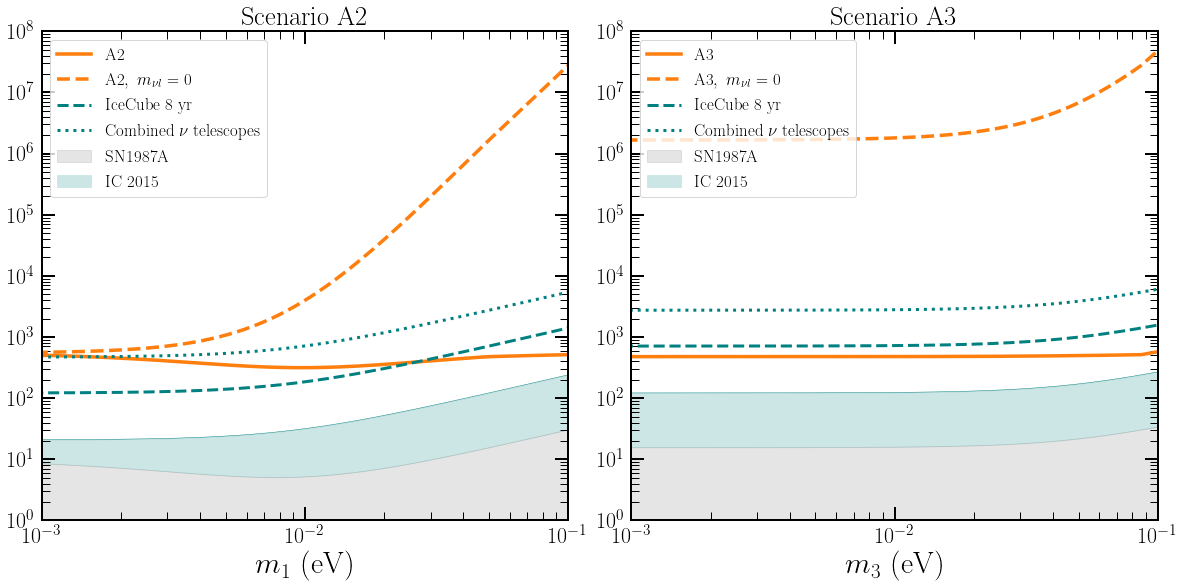

In [6]:
#fig,ax2,ax3 = MyDoublePlot(r'$m_1~(\rm{eV})$',r'${\rm Neutrino~lifetime,~}\tau_0~(s)$',r'$m_3~(\rm{eV})$','')
fig,ax2,ax3 = MyDoublePlot(r'$m_1~(\rm{eV})$','',r'$m_3~(\rm{eV})$','')

x = np.linspace(0.0008, 0.1, num=1001, endpoint=True)
col = cm.summer(np.linspace(0,0.7,3))
al = 0.2

# Our work 

ax2.loglog(x,tau0(Pre,1,m2NO(x),x,myYA(m2NO(x))),lw=3.5,c='C1',label=r'${\rm A2}$')      
ax3.loglog(x,tau0(Pre,1,m2IO(x),m1IO(x),myYA(m2IO(x))),lw=3.5,c='C1',label=r'${\rm A3}$')

# Naive estimation

ax2.loglog(x,tau0naive(Pre,1,m2NO(x),x,myYA(m2NO(x))),lw=3.5,label=r'${\rm A2},~m_{\nu l}=0$',c='C1',ls='--')
ax3.loglog(x,tau0naive(Pre,1,m2IO(x),m1IO(x),myYA(m2IO(x))),lw=3.5,label=r'${\rm A3},~m_{\nu l}=0$',c='C1',ls='--')

# SN1987A

ax2.fill_between(x,tau0SN(gmax,m2NO(x),x),tau0SN(gmin,m2NO(x),x),color='gray',linewidth=1,alpha=al,zorder=1,label='SN1987A')
ax3.fill_between(x,tau0SN(gmax,m2IO(x),m1IO(x)),tau0SN(gmin,m2IO(x),m1IO(x)),color='gray',linewidth=1,zorder=1,alpha=al,label='SN1987A')

# IceCube

ax2.plot(x,2400*x*m2NO(x)/x,c='teal',lw=0.5)
ax3.plot(x,2400*x*m2IO(x)/x,c='teal',lw=0.5) 
ax2.fill_between(x,2400*x*m2NO(x)/x,tau0SN(gmin,m2NO(x),x),color='teal',linewidth=0.5,alpha=al,zorder=0,label='IC 2015')
ax3.fill_between(x,2400*x*m2IO(x)/x,tau0SN(gmin,m2IO(x),m1IO(x)),color='teal',linewidth=0.5,alpha=al,zorder=0,label='IC 2015')
ax2.plot(x,14000*x*m2NO(x)/x,c='teal',ls='--',lw=3,label='IceCube 8 yr')
ax3.plot(x,14000*x*m2IO(x)/x,c='teal',ls='--',lw=3,label='IceCube 8 yr')
#ax2.plot(x,40000*x*m2NO(x)/x,c='teal',ls='dotted',lw=3,label=' IC 15 yr + IC-Gen2 10 yr')
#ax3.plot(x,40000*x*m2IO(x)/x,c='teal',ls='dotted',lw=3,label=' IC 15 yr + IC-Gen2 10 yr')
ax2.plot(x,54000*x*m2NO(x)/x,c='teal',ls='dotted',lw=3,label=r' Combined $\nu$ telescopes')
ax3.plot(x,54000*x*m2IO(x)/x,c='teal',ls='dotted',lw=3,label=r' Combined $\nu$ telescopes')


ax2.set_title(r'${\rm Scenario~A2}$')
ax3.set_title(r'${\rm Scenario~A3}$')

ax2.set_xlim(0.001,0.1)
ax2.set_ylim(1,1e8)
ax3.set_xlim(0.001,0.1)
ax3.set_ylim(1,1e8)

ax2.yaxis.set_major_locator(ticker.LogLocator(base=10 ,numticks=15))
ax2.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs = np.arange(1.0, 10.0) * 0.1,numticks=15))
ax3.yaxis.set_major_locator(ticker.LogLocator(base=10 ,numticks=15))
ax3.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs = np.arange(1.0, 10.0) * 0.1,numticks=15))

ax2.legend(frameon=True,ncol=1,loc=2,prop={'size': 17})
ax3.legend(frameon=True,ncol=1,loc=2,prop={'size': 17})

fig.savefig('/Users/z5278074/Desktop/life_A2A3.pdf',bbox_inches='tight')

# Scenario A1,B

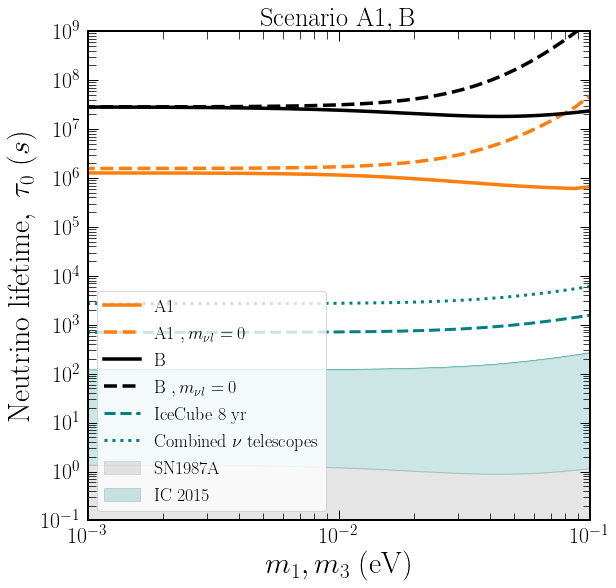

In [7]:
fig,ax1 = MySquarePlot(r'$m_1,m_3~(\rm{eV})$',r'${\rm Neutrino~lifetime,~}\tau_0~(s)$',size_x=9,size_y=9)

x = np.linspace(0.0008, 0.1, num=1001, endpoint=True)
col = cm.summer(np.linspace(0,0.7,3))
al = 0.2

# Our work 

ax1.loglog(x,tau0(Pre,1,m3NO(x),m2NO(x),myYA(m3NO(x))),lw=3.5,c='C1',label=r'${\rm A1}$')
ax1.loglog(x,tau0naive(Pre,1,m3NO(x),m2NO(x),myYA(m3NO(x))),lw=3.5,label=r'${\rm A1}~,m_{\nu l}=0$',c='C1',ls='--')
ax1.loglog(x,tau0(Pre,1,m3NO(x),x,myYB(m3NO(x))),lw=3.5,c='k',label=r'${\rm B}$')  
ax1.loglog(x,tau0naive(Pre,1,m3NO(x),x,myYB(m3NO(x))),lw=3.5,label=r'${\rm B}~,m_{\nu l}=0$',c='k',ls='--')

# SN1987A

ax1.fill_between(x,tau0SN(gmax,m3NO(x),m2NO(x)),tau0SN(gmin,m3NO(x),m2NO(x)),color='gray',linewidth=1,zorder=1,alpha=al,label='SN1987A')

# IceCube

ax1.plot(x,2400*x*m3NO(x)/x,c='teal',lw=0.5)    
ax1.fill_between(x,2400*x*m3NO(x)/x,tau0SN(gmin,m3NO(x),m2NO(x)),color='teal',linewidth=1,zorder=0,alpha=al,label='IC 2015')
ax1.plot(x,14000*x*m3NO(x)/x,c='teal',ls='--',lw=3,label='IceCube 8 yr')
#ax1.plot(x,40000*x*m3NO(x)/x,c='teal',ls='dotted',lw=3,label=' IC 15 yr + IC-Gen2 10 yr')
ax1.plot(x,54000*x*m3NO(x)/x,c='teal',ls='dotted',lw=3,label=r' Combined $\nu$ telescopes')

ax1.set_title(r'${\rm Scenario~A1, B}$')

ax1.set_xlim(0.001,0.1)
ax1.set_ylim(1e-1,1e9)

ax1.yaxis.set_major_locator(ticker.LogLocator(base=10 ,numticks=15))
ax1.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs = np.arange(1.0, 10.0) * 0.1,numticks=15))

ax1.legend(frameon=True,ncol=1,loc=3,prop={'size': 18})

fig.savefig('/Users/z5278074/Desktop/life_A1B_single.pdf',bbox_inches='tight')

In [ ]:
# fig,ax1,ax2,ax3 = MyTriplePlot(r'$m_1,~m_3~(\rm{eV})$',r'${\rm Neutrino~lifetime,~}\tau_0~(s)$',r'$m_1~(\rm{eV})$','',r'$m_3~(\rm{eV})$','')

# x = np.linspace(0.0008, 0.1, num=1001, endpoint=True)
# col = cm.summer(np.linspace(0,0.7,3))
# al = 0.2

# # # Our work + Escudero/Fairbairn (to be removed at some point)

# # ax1.loglog(x,tau0(Pre,1,m3NO(x),m2NO(x),YA(m3NO(x))),lw=3.5,c='k',label=r'${\rm This~work}$')  # tau0_A1 
# # ax2.loglog(x,tau0(Pre,1,m2NO(x),x,YA(m2NO(x))),lw=3.5,c='k',label=r'${\rm This~work}$')        # tau0_A2
# # ax3.loglog(x,tau0(Pre,1,m2IO(x),m1IO(x),YA(m2IO(x))),lw=3.5,c='k',label=r'${\rm This~work}$')  # tau0_A3

# # Our work 

# ax1.loglog(x,tau0(Pre,1,m3NO(x),m2NO(x),myYA(m3NO(x))),lw=3.5,c='k')#,label=r'${\rm This~work}$')  # tau0_A1 
# ax2.loglog(x,tau0(Pre,1,m2NO(x),x,myYA(m2NO(x))),lw=3.5,c='k')#,label=r'${\rm This~work}$')          # tau0_A2
# ax3.loglog(x,tau0(Pre,1,m2IO(x),m1IO(x),myYA(m2IO(x))),lw=3.5,c='k')#,label=r'${\rm This~work}$')    # tau0_A3

# # Naive estimation

# # ax1.loglog(x,tau0naive(Pre,1,m3NO(x),m2NO(x),YA(m3NO(x))),lw=3.5,label=r'$m_{\nu l}=0$',c='k',ls='--')
# # ax2.loglog(x,tau0naive(Pre,1,m2NO(x),x,YA(m2NO(x))),lw=3.5,label=r'$m_{\nu l}=0$',c='k',ls='--')
# # ax3.loglog(x,tau0naive(Pre,1,m2IO(x),m1IO(x),YA(m2IO(x))),lw=3.5,label=r'${\rm A3, ~naive}$',c='k',ls='--')

# ax1.loglog(x,tau0naive(Pre,1,m3NO(x),m2NO(x),myYA(m3NO(x))),lw=3.5,label=r'$m_{\nu l}=0$',c='k',ls='--')
# ax2.loglog(x,tau0naive(Pre,1,m2NO(x),x,myYA(m2NO(x))),lw=3.5,label=r'$m_{\nu l}=0$',c='k',ls='--')
# ax3.loglog(x,tau0naive(Pre,1,m2IO(x),m1IO(x),myYA(m2IO(x))),lw=3.5,label=r'${\rm A3, ~naive}$',c='k',ls='--')

# # SN1987A

# ax1.fill_between(x,tau0SN(gmax,m3NO(x),m2NO(x)),tau0SN(gmin,m3NO(x),m2NO(x)),color='gray',linewidth=1,zorder=1,alpha=al)
# ax2.fill_between(x,tau0SN(gmax,m2NO(x),x),tau0SN(gmin,m2NO(x),x),color='gray',linewidth=1,alpha=al,zorder=1,label='SN1987A')
# ax3.fill_between(x,tau0SN(gmax,m2IO(x),m1IO(x)),tau0SN(gmin,m2IO(x),m1IO(x)),color='gray',linewidth=1,zorder=1,alpha=al)

# # IceCube

# # 2020 measured 

# ax1.plot(x,2400*x*m3NO(x)/x,c='teal',lw=0.5)    # A1
# ax2.plot(x,2400*x*m2NO(x)/x,c='teal',lw=0.5)    # A2
# ax3.plot(x,2400*x*m2IO(x)/x,c='teal',lw=0.5)    # A3

# ax1.fill_between(x,2400*x*m3NO(x)/x,tau0SN(gmin,m3NO(x),m2NO(x)),color='teal',linewidth=1,zorder=0,alpha=al)
# ax2.fill_between(x,2400*x*m2NO(x)/x,tau0SN(gmin,m2NO(x),x),color='teal',linewidth=1,alpha=al,zorder=0,label='IC 2015')
# ax3.fill_between(x,2400*x*m2IO(x)/x,tau0SN(gmin,m2IO(x),m1IO(x)),color='teal',linewidth=1,alpha=al,zorder=0)


# ax1.plot(x,14000*x*m3NO(x)/x,c='teal',ls='--',lw=3)
# ax2.plot(x,14000*x*m2NO(x)/x,c='teal',ls='--',lw=3,label='IceCube 8 yr')
# ax3.plot(x,14000*x*m2IO(x)/x,c='teal',ls='--',lw=3)


# ax1.plot(x,40000*x*m3NO(x)/x,c='teal',ls='dotted',lw=3)
# ax2.plot(x,40000*x*m2NO(x)/x,c='teal',ls='dotted',lw=3,label=' IC 15 yr + IC-Gen2 10 yr')
# ax3.plot(x,40000*x*m2IO(x)/x,c='teal',ls='dotted',lw=3,label=' IC 15 yr + IC-Gen2 10 yr')

# ax1.set_title(r'${\rm Scenario~A1}$')
# ax2.set_title(r'${\rm Scenario~A2}$')
# ax3.set_title(r'${\rm Scenario~A3}$')

# ax1.set_xlim(0.001,0.1)
# ax1.set_ylim(1e-1,1e8)
# ax2.set_xlim(0.001,0.1)
# ax2.set_ylim(1e-1,1e8)
# ax3.set_xlim(0.001,0.1)
# ax3.set_ylim(1e-1,1e8)

# ax1.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
# ax2.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
# ax3.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))

# ax2.legend(frameon=False,ncol=1,loc=2,prop={'size': 22})